# Махницкий Никита, ФПМИ БГУ, 2к. 12г.
### Решение СЛАУ методами Якоби и Гаусса-Зейделя

In [2]:
# Методы Якоби и Гаусса-Зейделя

# 1. Теоретически исследовать сходимость методов Якоби и Гаусса-Зейделя для системы Ax = b.
n = 3
A = [
    [12, 28, 25],
    [-33, 39, -30],
    [14, -20, 19]
]

# Воспользуемся леммой о сходимости по методу Якоби.
# Рассмотрим СЛАУ Ax = b. Если матрица
# A имеет строгое диагональное преобладание, то метод Якоби для такой
# системы сходится при любом начальном приближении. Это же работает и для метода Гаусса-Зейделя.
# Ведь по существу он отличается лишь тем, что на итерации мы используем все уточненные к данному
# моменту компоненты.
# Матрица A не имеет строгого диагонального преобразования.
# Для всех строк |a_ii| < sum(|a_ij|), где j <> i.
# Перестановка строк для данной матрицы не подходит, диагонального преобладания не добиться
# Достаточное условие не выполняется!

# Капнем глубже
# Для метода Якоби найдём матрицу B (x^k+1 = Bx^k + g)
# B = -(D + L)^-1 * R
import numpy as np

D = np.matrix([
    [12, 0, 0],
    [0, 39, 0],
    [0, 0, 19]
])
L = np.matrix([
    [0, 0, 0],
    [-33, 0, 0],
    [14, -20, 0]
])
R = np.matrix([
    [0, 28, 25],
    [0, 0, -30],
    [0, 0, 0]
])
B_j = 1 - np.linalg.inv(D) * A
B_s =  -np.linalg.inv((D + L)) * R

In [3]:
# Найдем собственные значения матрицы B для метода Якоби и Гаусса-Зейделя
print(np.linalg.eig(B_j))
print(np.linalg.eig(B_s))


(array([ 0.92667976+1.30048197j,  0.92667976-1.30048197j,
       -1.85335952+0.j        ]), matrix([[ 0.6993492 +0.j        ,  0.6993492 -0.j        ,
         -0.0443276 +0.j        ],
        [-0.10675487-0.43376465j, -0.10675487+0.43376465j,
         -0.66636534+0.j        ],
        [-0.46683039-0.305666j  , -0.46683039+0.305666j  ,
          0.74430659+0.j        ]]))
(array([ 0.        , -2.11150367,  0.62634848]), matrix([[ 1.        , -0.77581749,  0.87155582],
        [ 0.        , -0.62503138,  0.17498049],
        [ 0.        , -0.08627277, -0.45800903]]))


In [4]:
# Используем критерий сходимости - Итерационный процесс
# сходится при любом начальном приближении
# тогда и только тогда, когда все собственные значения матрицы B
# по модулю меньше единицы

# Для метода Якоби все ок, а вот в случае с методом Гаусса-Зейделя - непорядок,
# собственное значение -2.11150367

# Вывод - итерационный процесс Гаусса-Зейделя сходиться НЕ будет.
# А вот Якоби должен сойтись

In [5]:

# 2. Подтвердить сделанные выводы экспериментально путем построения логарифмических диаграмм сходимости.
# Диаграмма должна быть общей для двух итерационных процессов, обязательно наличие легенды с указанием методов.

# Возьмем точное решение solution = (1, 2, 3) ^ T
solution = (1, 2, 3)
# Вычислим вектор b
b = [sum([A[i][j] * solution[j] for j in range(n)]) for i in range(n)]
print(b)

[143, -45, 31]


In [6]:
# Запустим итерационный процесс и построим логарифмическую диаграмму сходимости
# Определим количество итераций для диаграммы, а также соответствующий вектор с нормами x^k - x*, 
# где k - номер итерации, а x* - точное решение
iterations_count = (1, 2, 3, 4, 5, 10, 15, 20, 30, 45, 60, 75, 90, 110)
jacobi_it_diff = []
# Метод Якоби
import math
Xprev = [0, 0, 0]
Xnext = [0, 0, 0]
iteration = 0
for cnt in iterations_count:
    while iteration != cnt:
        Xnext = [(1 / A[i][i]) * (b[i] - sum([A[i][j] * Xprev[j] for j in range(n) if j != i])) for i in range(n)]
        Xprev = Xnext
        # print(Xnext)
        iteration += 1
    jacobi_it_diff.append(math.sqrt(sum([math.pow(Xnext[i] - solution[i], 2) for i in range(n)])))

In [7]:
jacobi_it_diff

[11.44521440823747,
 17.330941080161033,
 4.706724662023288,
 6.2028132359043315,
 8.669835536806207,
 5.068501474553728,
 3.5768710270554913,
 2.9128198044925586,
 1.9949757476910206,
 1.1090735394412978,
 0.6168985320613354,
 0.34313025036528483,
 0.19085541368192163,
 0.08730352503869554]

In [8]:
zeidel_gauss_diff = []
iteration = 0
Xprev = [0, 0, 0]
Xnext = [0, 0, 0]
for cnt in iterations_count:
    while iteration != cnt:
        for i in range(n):
            Xnext[i] = (1 / A[i][i]) * (b[i] - sum([A[i][j] * Xnext[j] for j in range(i)]) - sum([A[i][k] * Xprev[k] for k in range(i + 1, n)]))
        Xprev = Xnext
        # print(Xnext)
        iteration += 1
    zeidel_gauss_diff.append(math.sqrt(sum([math.pow(Xnext[i] - solution[i], 2) for i in range(n)])))

In [9]:
zeidel_gauss_diff

[12.951965013956004,
 19.719604059430402,
 46.05739196073726,
 94.39713040650126,
 201.09241768489287,
 8423.13633496997,
 353537.153524057,
 14838645.618229786,
 26140426938.878952,
 1932815040889622.2,
 1.4291174321766334e+20,
 1.056684986273224e+25,
 7.813095936522308e+29,
 2.4247110066165495e+36]

Text(0.5, 1.0, 'Сходимость итерационных методов')

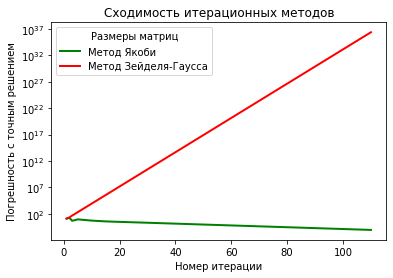

In [15]:
# Построим диаграммы сходимости
from matplotlib import pyplot as plt
_, ax = plt.subplots()
ax.semilogy(iterations_count, jacobi_it_diff, lw = 2, color = 'green', alpha = 1, label='Метод Якоби')

ax.semilogy(iterations_count, zeidel_gauss_diff, lw = 2, color = 'red', alpha = 1, label='Метод Зейделя-Гаусса')
ax.legend(title='Размеры матриц')
ax.set_ylabel('Погрешность с точным решением')
ax.set_xlabel('Номер итерации')
ax.set_title('Сходимость итерационных методов')


In [17]:
# Задание 5. Итерационные методы для разреженных СЛАУ особого вида
# 1. Написать программу, которая при данном n решает СЛАУ A_n*x = b_n
# Метод №1 - Якоби
# Матрица вида
# M =   d 0 e
#       0 d 0 e
#       c 0 d 0 e
#       0 c 0 d 0 e
#       ...................
# Где с = -1, d = 4, e = 2
# Матрица трехдиагональная, а еще элементы каждой диагонали одинаковые
# Собственно, это значит, что хранить матрицу я не буду вообще
# Модифицирую метод Якоби 
# Представлю решение задачи в виде создания класса обертки
import math

class jacoby_special_matrix:
    """Класс обертка для получения решения СЛАУ трехдиагональной матрицы особого вида.
     M = d 0 e
         0 d 0 e
         c 0 d 0 e
         0 c 0 d 0 e
    """
    c, d, e = -1, 6, 3

    def __init__(self, n: int, b: list, ksi=1 / 100):
        """n - размер матрицы, b - правая часть СЛАУ, ksi - макс. допустимая невязка """
        if len(b) != n or n < 5:
            raise ArithmeticError("Неверные размеры")
        self.n = n
        self.b = b
        self._iteration_solutions = []
        self.x = [0] * n
        self._iteration = 0
        self.ksi = ksi

    def do_iteration(self):
        """Совершает одну итерацию метода Якоби"""
        x_prev = self.x
        x_next = [0] * self.n
        x_next[0] = (1 / self.d) * (self.b[0] - x_prev[2] * self.e)
        x_next[1] = (1 / self.d) * (self.b[1] - x_prev[3] * self.e)
        x_next[-1] = (1 / self.d) * (self.b[-1] - x_prev[-3] * self.c)
        x_next[-2] = (1 / self.d) * (self.b[-2] - x_prev[-4] * self.c)
        x_next[2:-2] = [(1 / self.d) * (self.b[i] - x_prev[i + 2] * self.e - x_prev[i - 2] * self.c) for i in
                        range(2, self.n - 2)]
        self.x = x_next
        self._iteration += 1

    def get_accuracy(self) -> float:
        """Возвращает норму текущей невязки ||Ax - b||
        Обозначу как accuracy вектор, который содержит компоненты вектора
         Ax - b, возведенные в квадрат
        """
        accuracy = []
        accuracy.append(math.pow(self.d * self.x[0] + self.e * self.x[2] - self.b[0], 2))  # Первая компонента
        accuracy.append(math.pow(self.d * self.x[1] + self.e * self.x[3] - self.b[1], 2))  # Вторая строка
        accuracy.append(math.pow(self.d * self.x[-2] + self.c * self.x[-4] - self.b[-2], 2))  # Предпоследняя строка
        accuracy.append(math.pow(self.d * self.x[-1] + self.c * self.x[-3] - self.b[-1], 2))  # Последняя строка
        for i in range(2, self.n - 2):
            # Все средние строки вектора
            accuracy.append(math.pow(self.c * self.x[i-2] + self.d * self.x[i] + self.e * self.x[i+2] - self.b[i], 2))
        return math.sqrt(sum(accuracy))

    def solve(self):
        while self.get_accuracy() > self.ksi:
            self.do_iteration()
            assert self._iteration < 300
        return self.x

    def get_iteration(self):
        return self._iteration



In [18]:
# 2. Подвердить правильность работы программы на примере нескольких СЛАУ размерности 5-10
# Решим задачу с заданным решением x = (1, 1, 1, 1, 1, 1, 1, 1, 1, 1)^T

solution = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
n = 10
b = [9, 9, 8, 8, 8, 8, 8, 8, 5, 5]
ksi = 1/100
jacoby = jacoby_special_matrix(n, b)
x = jacoby.solve()
k = jacoby.get_iteration()

print('Полученное решение:', x)
print('Точное решение: ', solution)
print('Достигнуто на итерации №', k)

Полученное решение: [1.0004842624742798, 1.0004842624742798, 1.00032284164952, 1.00032284164952, 0.9996744791666667, 0.9996744791666667, 0.9998905999942844, 0.9998905999942844, 1.0000547000028577, 1.0000547000028577]
Точное решение:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Достигнуто на итерации № 11


In [19]:
# Решим задачу с заданным решением x = (1, 2, 3, 4, 5)^T

solution = [1, 2, 3, 4, 5]
n = 5
b = [15, 24, 32, 22, 27]
ksi = 1/10
jacoby = jacoby_special_matrix(n, b, ksi)
x = jacoby.solve()
k = jacoby.get_iteration()

print('Полученное решение:', x)
print('Точное решение: ', solution)
print('Достигнуто на итерации №', k)

Полученное решение: [0.9930555555555554, 1.9988425925925926, 2.989197530864198, 4.000192901234568, 5.002314814814815]
Точное решение:  [1, 2, 3, 4, 5]
Достигнуто на итерации № 7


In [20]:
# 3. Построить диаграмму сходимости (общую), для n = 100, 1000, 10000
# Для СЛАУ данных размерностей сгенерирую векторы b случайным образом
# И создам для них три экземпляра решения методом Якоби

from numpy import random
b1 = [random.randint(1, 100) for _ in range(100)]
jacoby1 = jacoby_special_matrix(100, b1)

b2 = [random.randint(1, 100) for _ in range(1000)]
jacoby2 = jacoby_special_matrix(1000, b2)

b3 = [random.randint(1, 100) for _ in range(10000)]
jacoby3 = jacoby_special_matrix(10000, b3)

In [21]:
# Получим данные для диаграммы сходимости
iterations_count = [5, 7, 9, 11, 13, 15]
j1_diff = []
for cnt in iterations_count:
    while jacoby1.get_iteration() < cnt:
        jacoby1.do_iteration()
    j1_diff.append(jacoby1.get_accuracy())
    

In [22]:
j1_diff

[18.471334771515057,
 7.4196895403804835,
 3.0545024291716674,
 1.2733414036789286,
 0.5350623935551059,
 0.22617901816571684]

In [23]:
j2_diff = []
for cnt in iterations_count:
    while jacoby2.get_iteration() < cnt:
        jacoby2.do_iteration()
    j2_diff.append(jacoby2.get_accuracy())
j2_diff

[66.72448178438997,
 27.381664379263096,
 11.504978881098504,
 4.888774372349376,
 2.092126342279925,
 0.8996481754492611]

In [24]:
j3_diff = []
for cnt in iterations_count:
    while jacoby3.get_iteration() < cnt:
        jacoby3.do_iteration()
    j3_diff.append(jacoby3.get_accuracy())
j3_diff

[202.4750332514069,
 82.20874538009666,
 34.282704363549676,
 14.489881801462143,
 6.177775190407142,
 2.650275135426214]

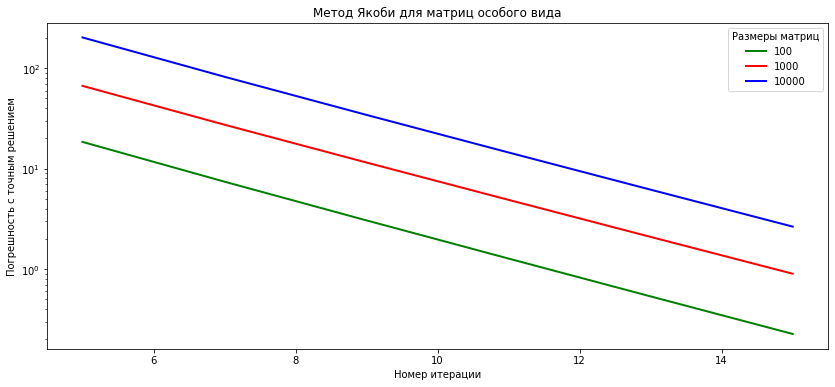

In [25]:
import numpy as np
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(figsize=(14, 6))

ax.semilogy(iterations_count, j1_diff, lw = 2, color = 'green', alpha = 1, label = '100')
ax.semilogy(iterations_count, j2_diff, lw = 2, color = 'red', alpha = 1, label = '1000')
ax.semilogy(iterations_count, j3_diff, lw = 2, color = 'blue', alpha = 1, label = '10000')
ax.legend(title='Размеры матриц')
ax.set_ylabel('Погрешность с точным решением')
ax.set_xlabel('Номер итерации')
ax.set_title('Метод Якоби для матриц особого вида')
plt.show()

In [27]:
# 4. Построить диаграмму, в которой по оси абсцисс изменяется n = [10^k/2], где k = 1..12, а на оси ординает время,
# необходимое, чтобы норма невязки не превышала 10^-8. (Здесь немного не понял с размерами... Взял от 10 до 1000000)
import datetime
sizes = [10, 100, 1000, 10000, 100000, 200000, 1000000]
work_times = []
for size in sizes:
    b = [random.randint(1, 100) for _ in range(size)]
    jacoby = jacoby_special_matrix(size, b, ksi=0.00000001)
    start = datetime.datetime.now()
    jacoby.solve()
    end = datetime.datetime.now()
    work_times.append(str(end-start))


In [28]:
work_times

['0:00:00.001323',
 '0:00:00.007769',
 '0:00:00.122360',
 '0:00:01.084503',
 '0:00:11.049433',
 '0:00:21.611330',
 '0:01:49.921222']

c:\users\makhn\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


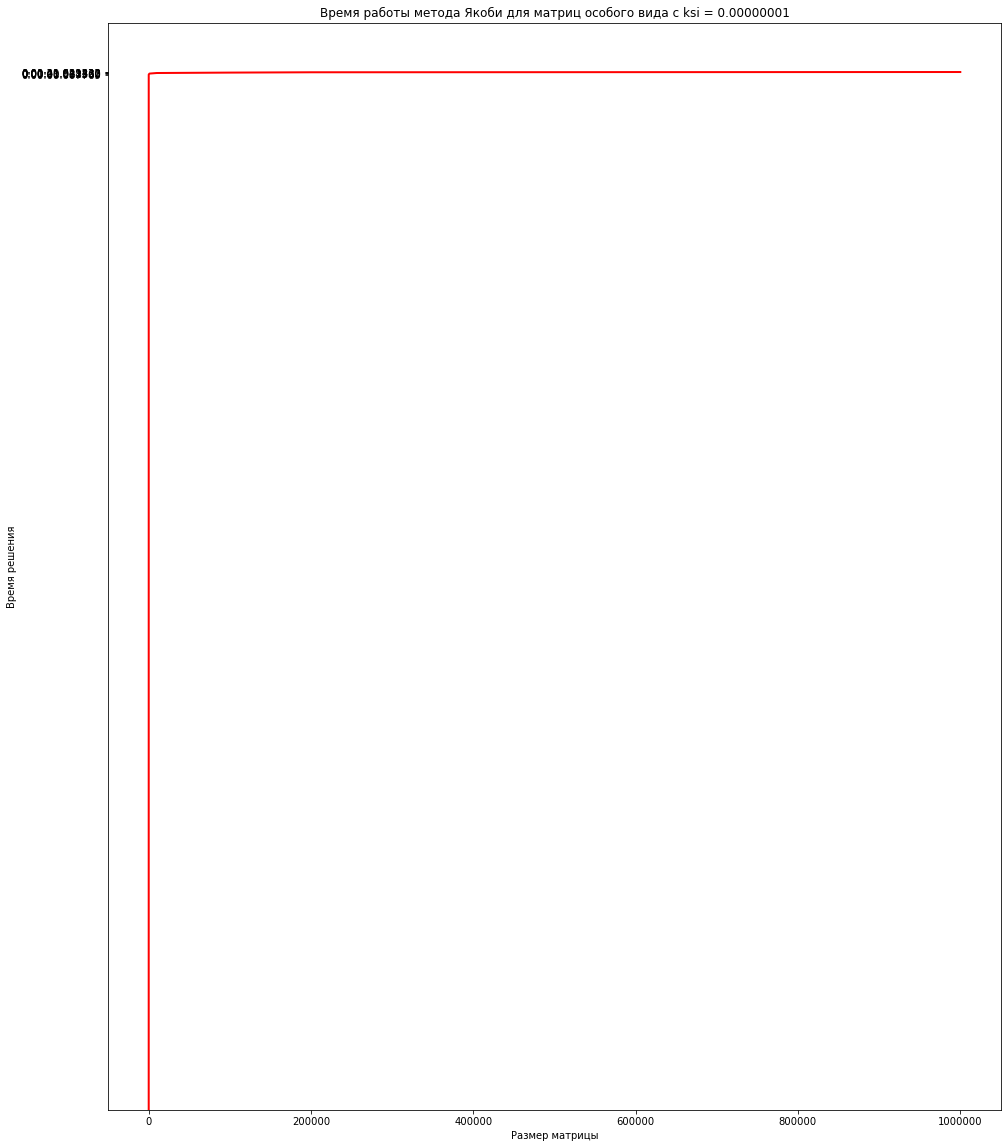

In [29]:
fig, ax = plt.subplots(figsize=(16, 20))

ax.semilogy(sizes, work_times, lw = 2, color = 'red', alpha = 1)
ax.set_ylabel('Время решения')
ax.set_xlabel('Размер матрицы')
ax.set_title('Время работы метода Якоби для матриц особого вида с ksi = 0.00000001')
plt.show()